# Plot the data
Used to map the COVID-19 cases of Germany on a map or plotting the number of cases/seven days incidence of one county.
<br/><br/><br/>
Provides the dictionary "counties_geography" with different kinds of geographical information about every German county. For more information check out the file "get_geographical_data_of_german_counties.ipynb".
<br/><br/>
Provides the accumulated COVID-19 case number and the seven days incidences of every german county and every day of the pandemic in the dictionary "covid19" (reachable by the county's AdmUnitID).
For more information check out the file "get_data.ipynb" (which calls the file "get_geographical_data_of_german_counties.ipynb" if needed).

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# used to determine which part of the plot shall be saved
from matplotlib.transforms import Bbox

## Get the data
More information about the data can be find inside the first cell.

In [2]:
%run get_data.ipynb
print("All data is ready!")

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!
All data is ready!


## Create color schemes

In [3]:
# check if the needed directory is availlable - otherwise create it
if not(os.path.isdir("pictures")): os.makedirs("pictures")
# check if the needed directory is availlable - otherwise create it
if not(os.path.isdir("pictures/germany_incidence_V2")): os.makedirs("pictures/germany_incidence_V2")

title_font = dict(family= 'serif', color= 'black', weight= 'bold', size= 85)

In [4]:
red_yellow_green = list()
# bigger steps in the darkgreen spectrum to make a bigger optical difference between
# smaller numbers (e.g. 7 and 8) in comparison to bigger numbers (e.g. 57 and 58)
# (most of the time most counties are green and hard to distinguish and only a few are red)
for color_step in np.arange(0.3,1,0.05):
    red_yellow_green.append((0, color_step, 0))
for color_step in np.arange(0,1,0.02):
    red_yellow_green.append((color_step, 1, 0))
for color_step in np.arange(0,1,0.01):
    red_yellow_green.append((1, 1 - color_step, 0))
for color_step in np.arange(0,0.93,0.005):
    red_yellow_green.append((1 - color_step, 0, 0))

In [5]:
def plot_map_of_germany_incidences(date_index, fig, ax):
    for AdmUnitID, county in covid19.items():
        color_index_incidence = int(county['incidences'][date_index])
        if color_index_incidence >= len(red_yellow_green):
            color = red_yellow_green[-1]
        else:
            color = red_yellow_green[color_index_incidence]
        for polygon in counties_geography[AdmUnitID]['geometry']:
            x,y = np.array(polygon).T
            plt.fill(x, y, color=color, facecolor="darkgrey")
        # draw the lines around the counties
        for polygon in counties_geography[AdmUnitID]['raw_geometry']:
            x,y = np.array(polygon).T
            plt.plot(x, y, color="black")

In [6]:
def plot_legend_incidences():
    ax1 = plt.axes([0.14, 0.1, 0.74, 0.02], frameon=False)
    ax1.axes.get_yaxis().set_visible(False)
    ax1.set_xticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350])
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(70)
    plt.title('Seven-days-incidence', fontsize=80)
    for color_index in range(len(red_yellow_green)):
        plt.fill([1+color_index, 1+color_index, 2+color_index, 2+color_index],
                 [1, 2, 2, 1], color=red_yellow_green[color_index])
        if color_index % 25 == 0:
            plt.fill([color_index, color_index, 1+color_index, 1+color_index],
                     [1, 2, 2, 1], color="black")

In [7]:
for date_index in range(len(non_county_specific_data['UTC'])-1, len(non_county_specific_data['UTC'])):
    fig = plt.figure(figsize = (50, 50), facecolor='darkgrey')
    ax = plt.axes(frameon=False)
    plt.title("Seven-days-incidences in Germany on day " + 
              str(non_county_specific_data['UTC'][date_index])[:10],
              fontdict=title_font)
    plot_map_of_germany_incidences(date_index, fig, ax)
    plot_legend_incidences()
    plt.savefig("pictures/germany_incidence_V2/" + str(date_index) + '.png',
                facecolor="darkgrey", bbox_inches=Bbox([[7,4],[44,46]]))
    plt.close('all')

## Plot examples

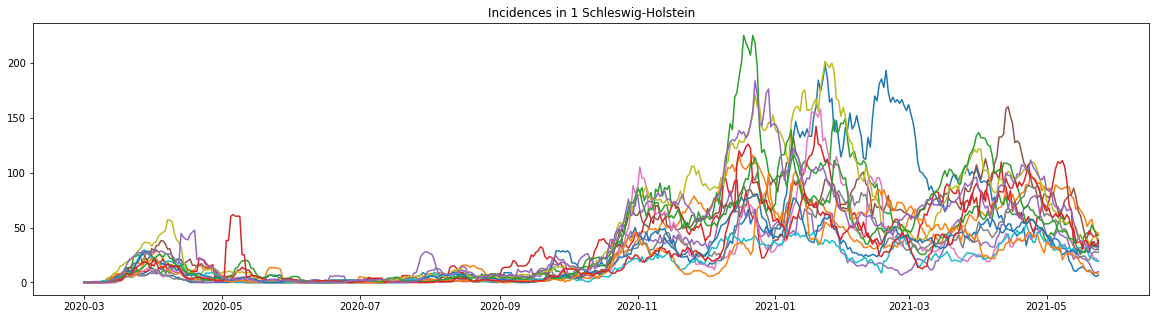

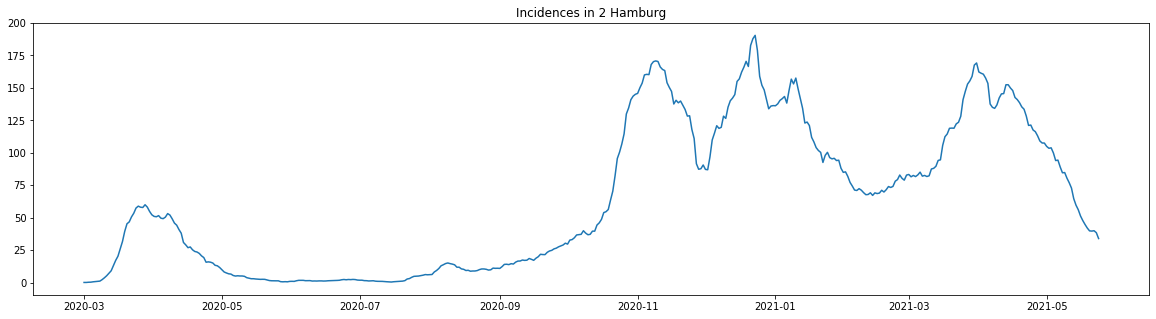

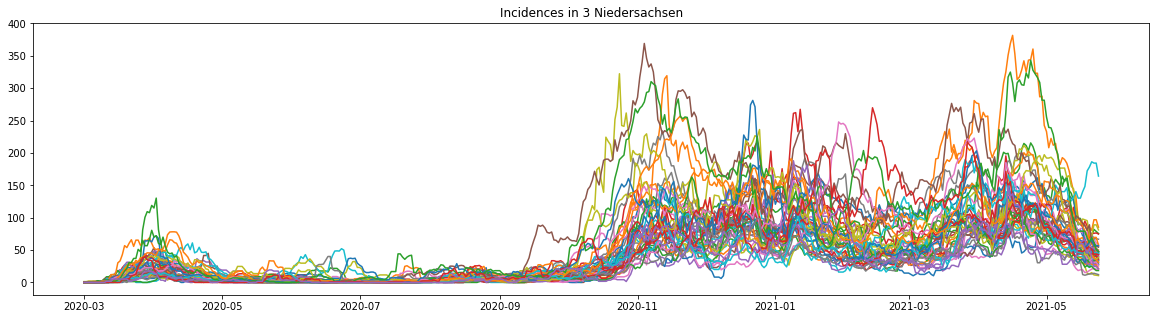

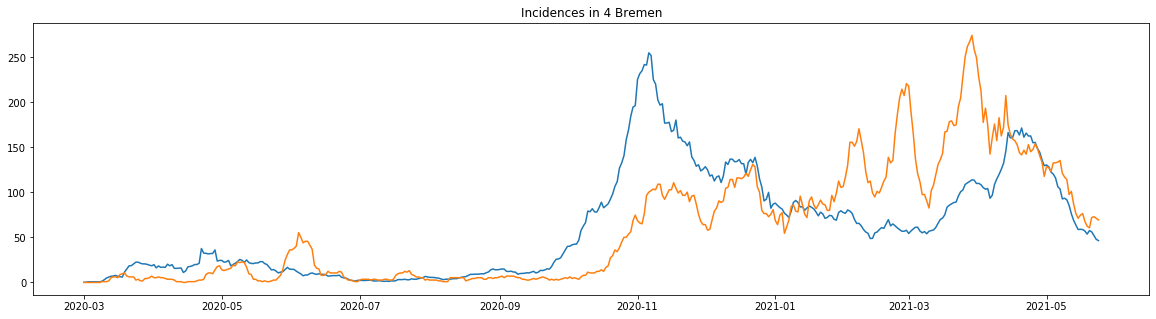

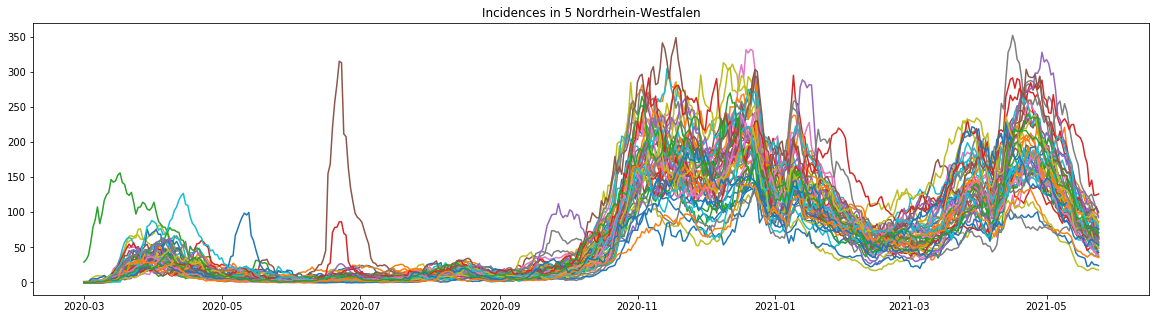

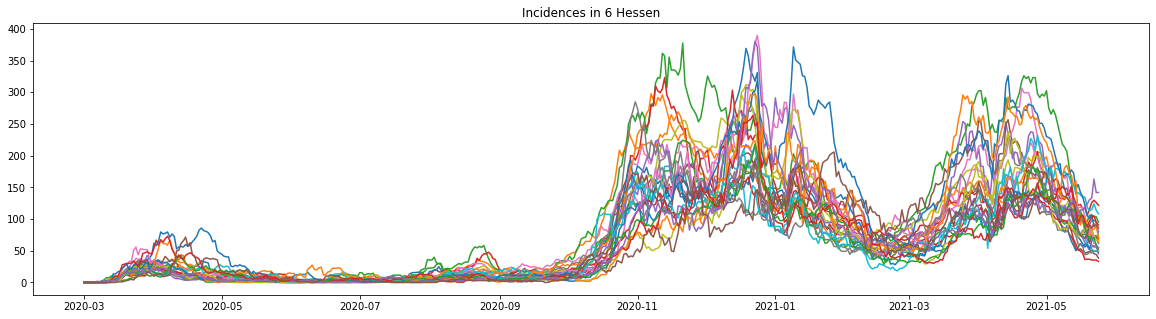

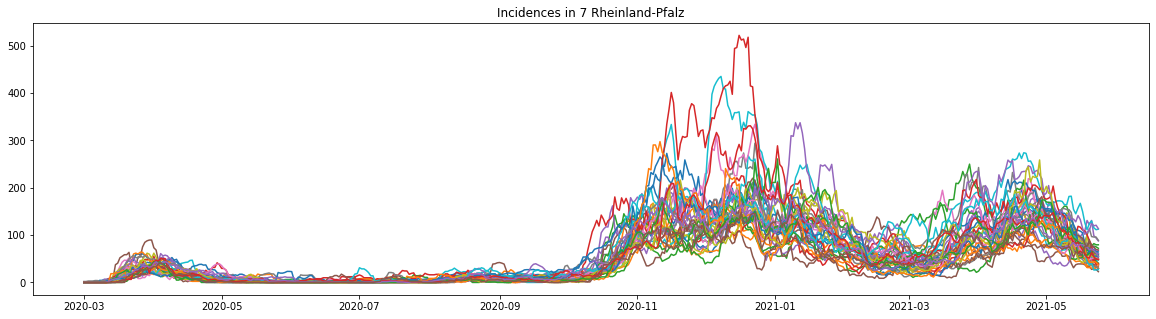

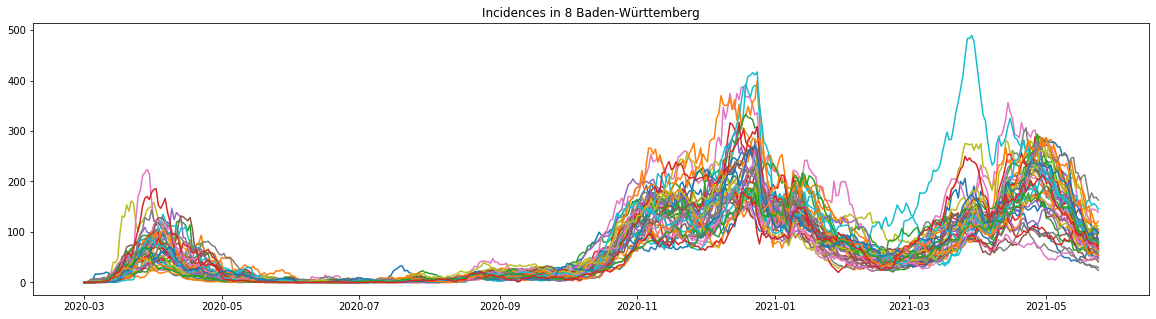

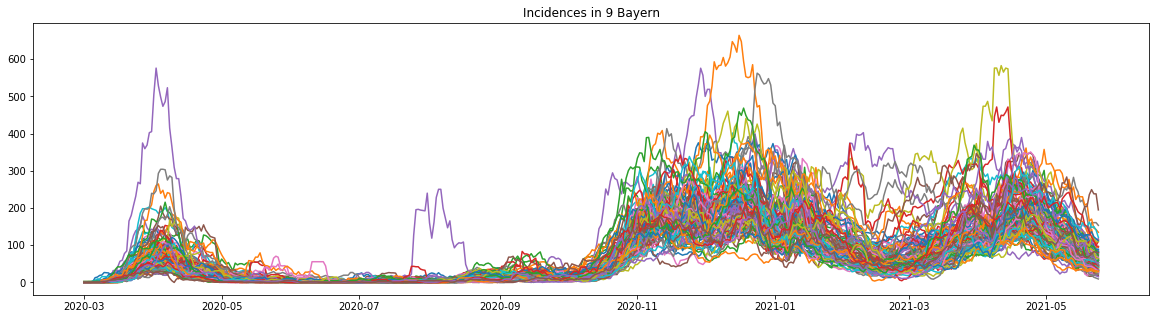

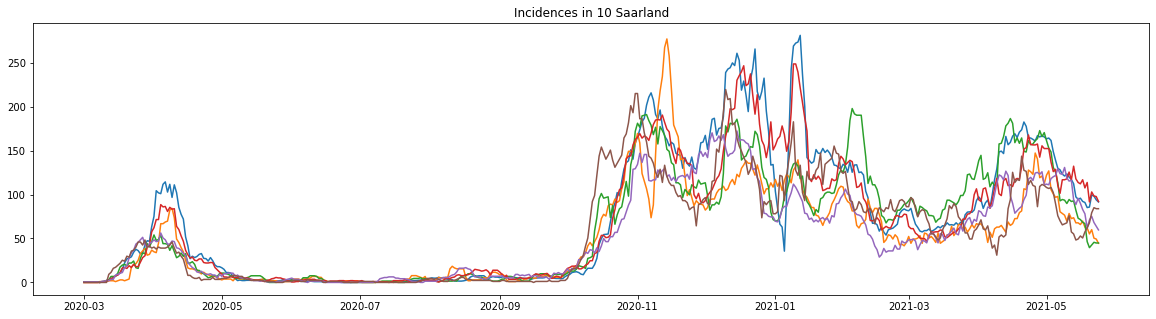

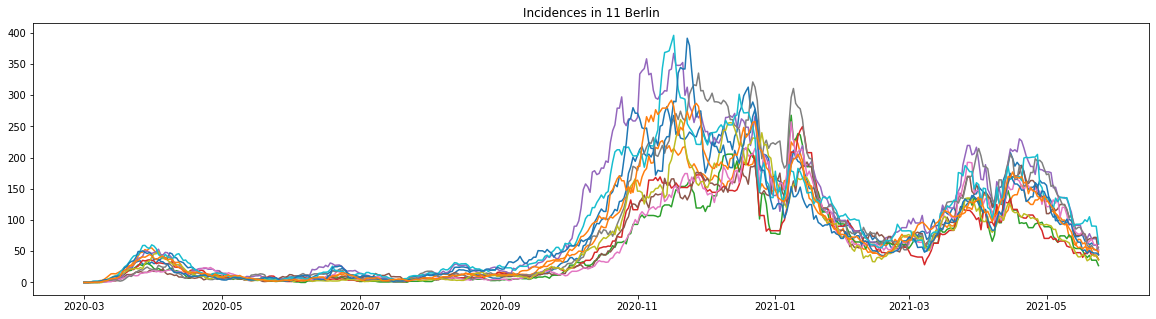

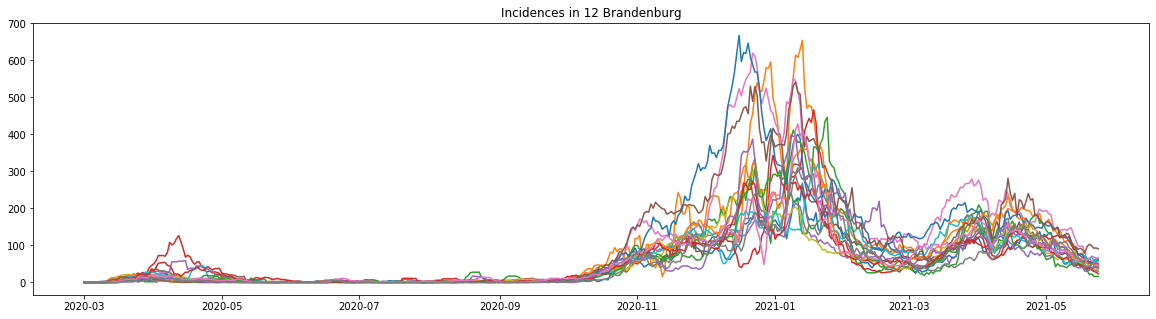

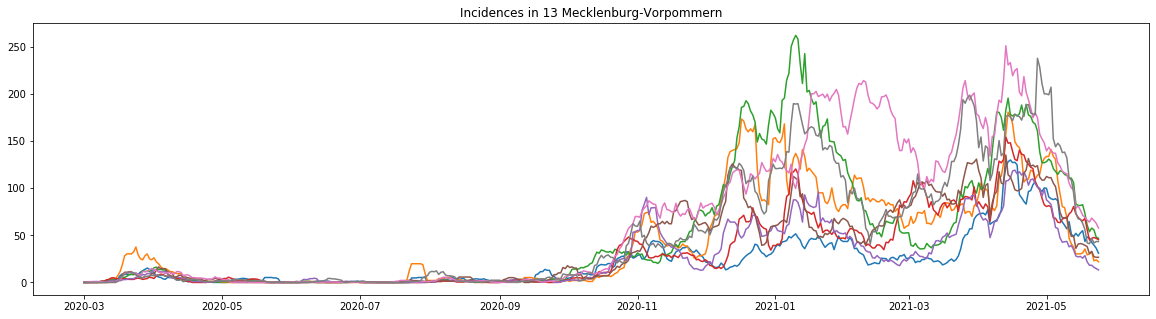

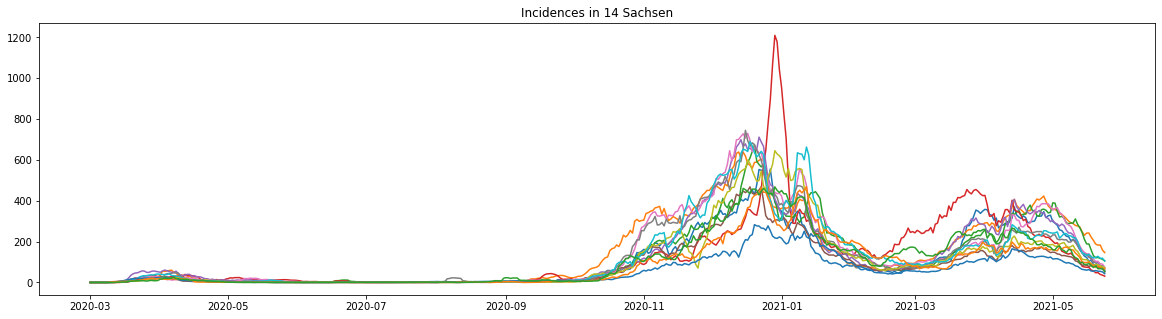

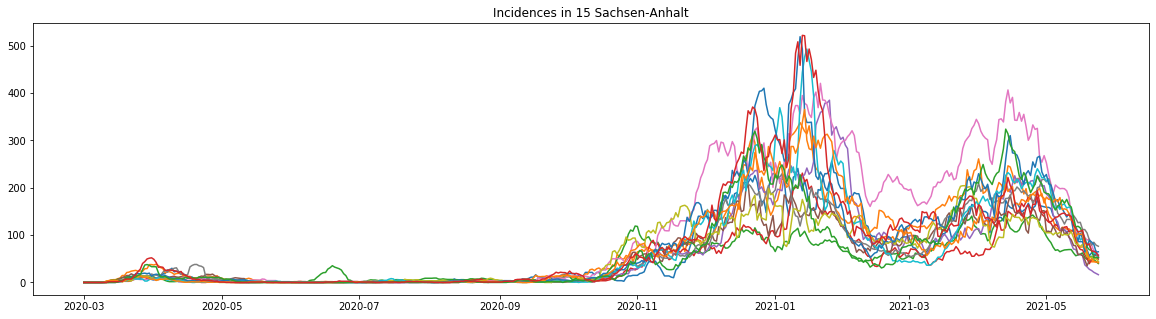

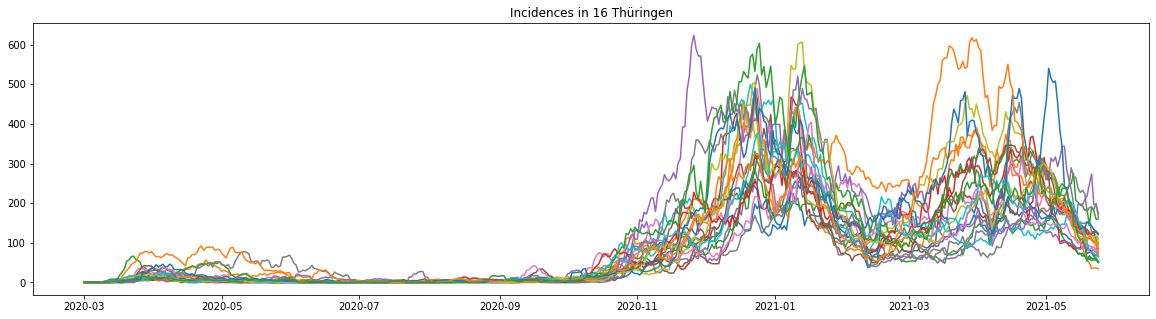

In [8]:
# copy to check that all counties are related to a federal state
covid19_copy = covid19.copy()
for stateID, state in non_county_specific_data['states'].items():
    plt.figure(figsize=(20, 5))    # enlarge plot
    plt.title("Incidences in {} {}".format(stateID, state))
    for AdmUnitID, county in covid19.items():
        if AdmUnitID[:-3] == stateID:
            plt.plot(non_county_specific_data['UTC'], county['incidences'])
            del covid19_copy[AdmUnitID]
    plt.show()

In [9]:
if len(covid19_copy) != 0:
    print('There seems to be at least one county being unrelated to any federal state:')
    for AdmUnitID in covid19_copy.keys():
        print(AdmUnitID + " " + counties_geography[AdmUnitId]['name'])

## Plot data of one state

In [10]:
example_state_ID = "13"
print("You have chosen {} {}".format(example_state_ID, non_county_specific_data['states'][example_state_ID]))

You have chosen 13 Mecklenburg-Vorpommern


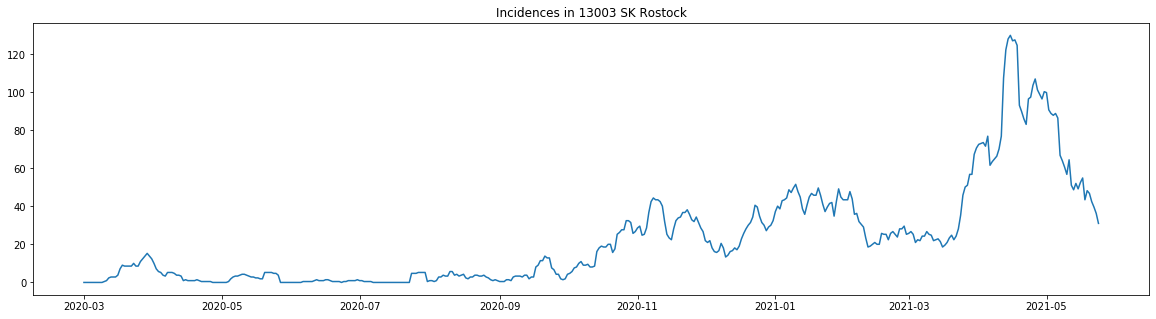

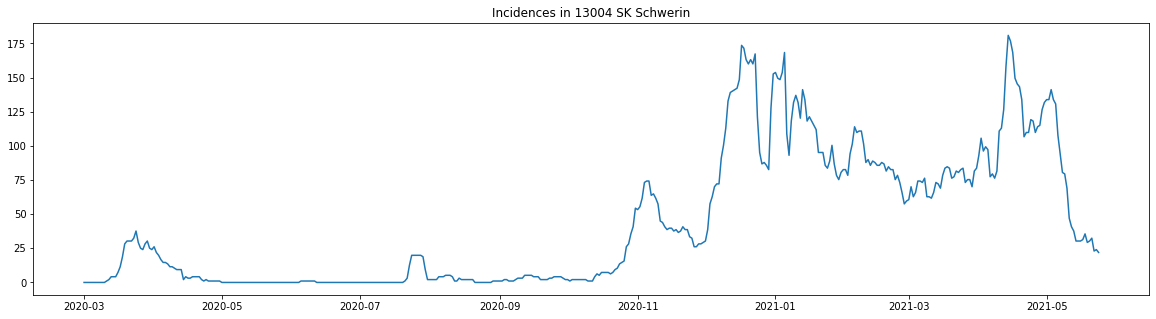

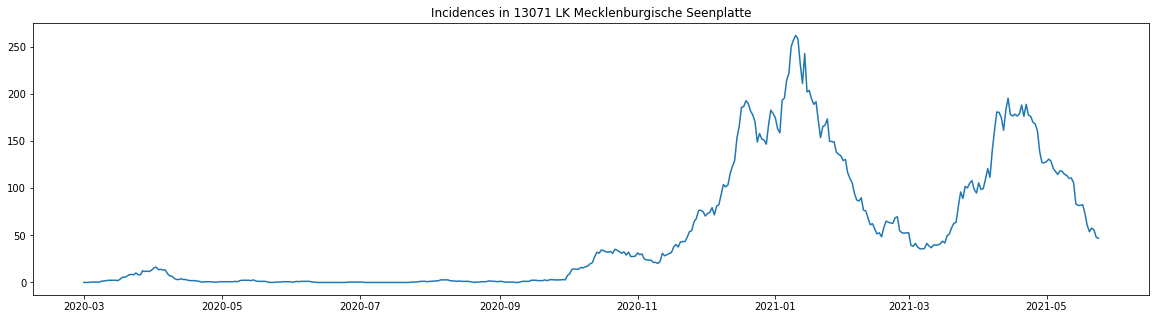

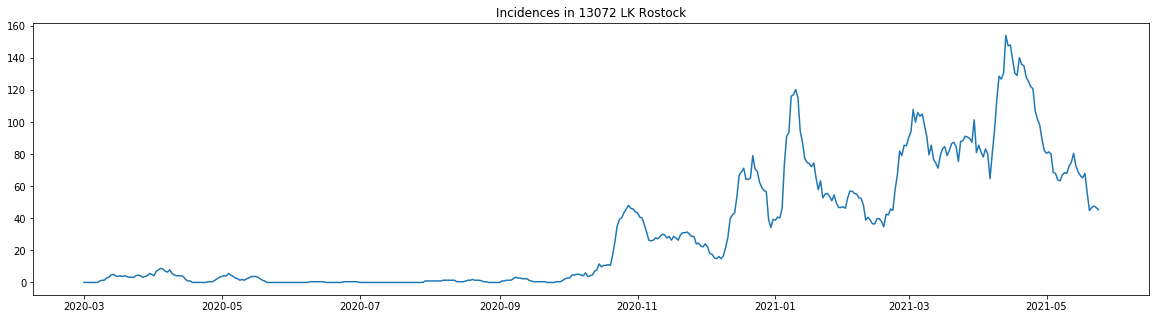

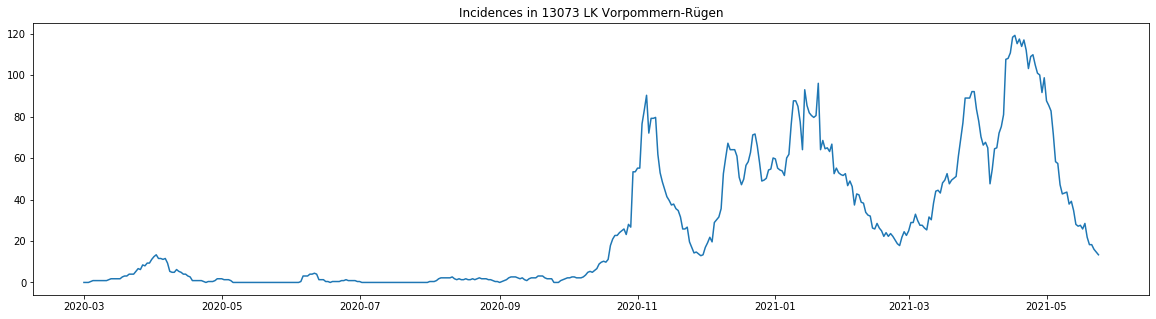

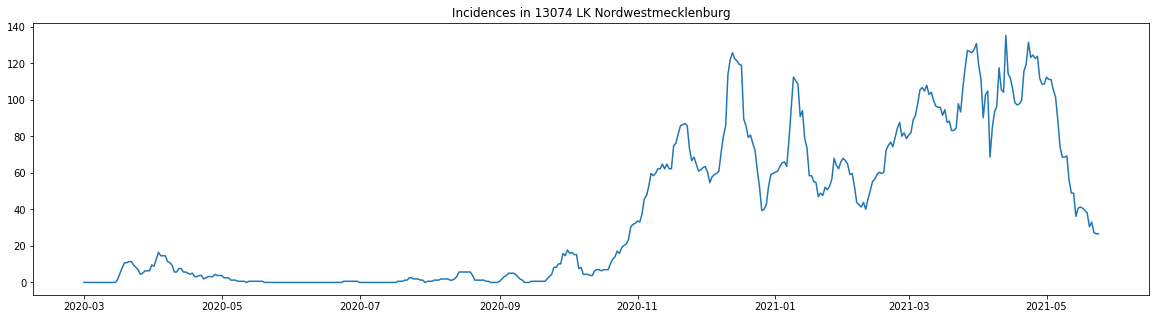

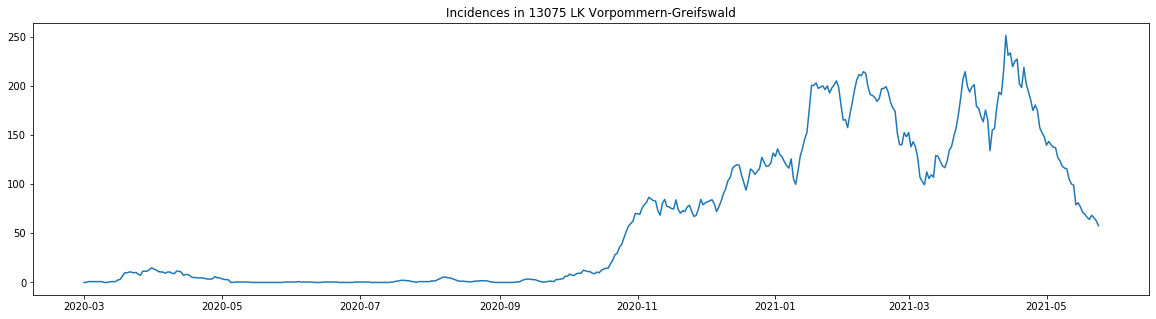

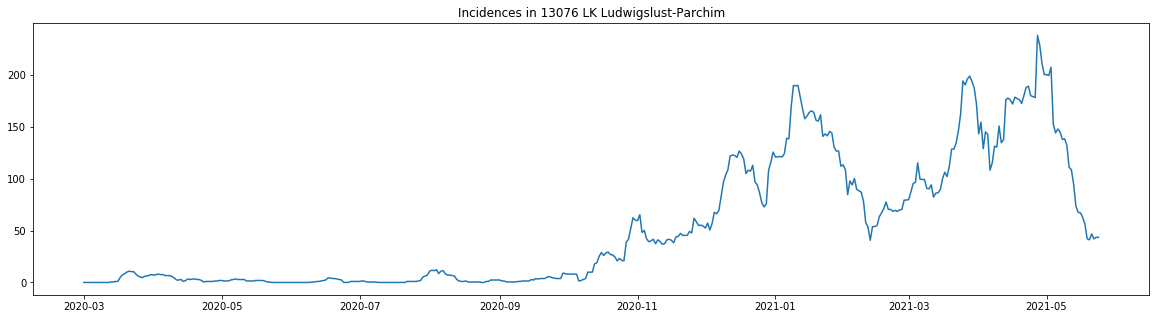

In [11]:
counties_in_example_state = list()
for AdmUnitID, county in covid19.items():
    if AdmUnitID[:-3] == "13":
        counties_in_example_state.append(AdmUnitID)
        plt.figure(figsize=(20, 5))    # enlarge plot
        plt.plot(non_county_specific_data['UTC'], county['incidences'])
        plt.title("Incidences in " + AdmUnitID + " " + counties_geography[AdmUnitID]['name'])
        plt.show()

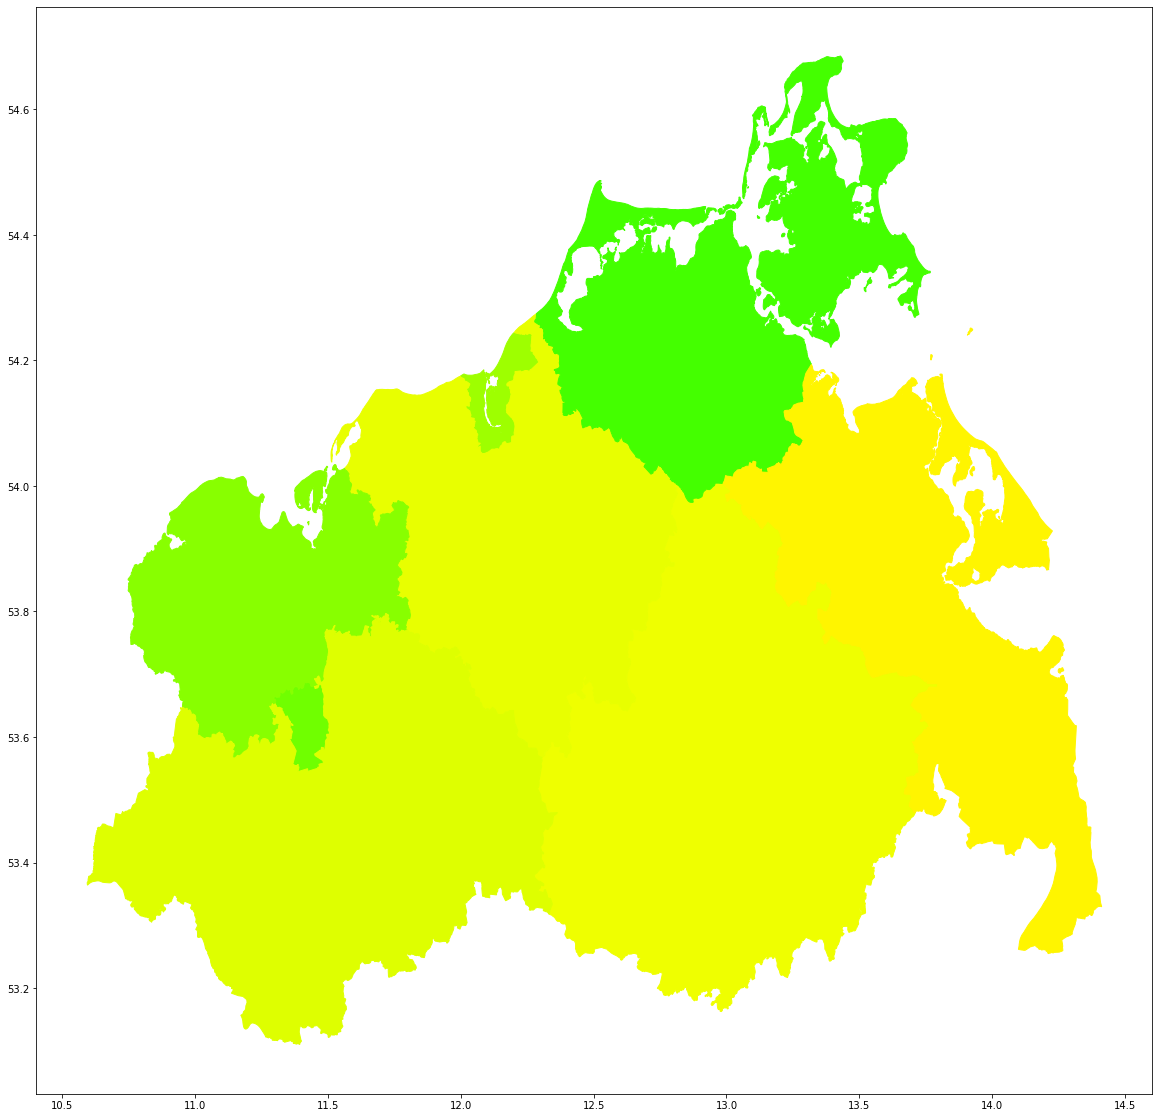

In [12]:
plt.figure(figsize = (20, 20))    # enlarge plot
for AdmUnitID in counties_in_example_state:
    # get last incidence and divide it by the highest incidence to get a number between 0 and 1
    # to get the full range of colors the both incidence values get subtracted by the lowest incidence
    color_step = covid19[AdmUnitID]['incidences'][-1]/250
    # everything bellow 0.5 gets drawn green
    if color_step > 1:
        color = (1, 1, 0)
    elif color_step < 0.2:
        color = (color_step * 5, 1, 0)
    else:
        color_step = (color_step - 0.2) * 1.25
        color = (1, 1 - color_step, 0)
    for polygon in counties_geography[AdmUnitID]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color)
plt.show()